In [1]:
from setting import *

%matplotlib inline

In [2]:
kbstar_bnd = fdr.DataReader('114100')
kodex200 = fdr.DataReader('069500')

data = pd.DataFrame()
data['kodex200'] = kodex200['Close']
data['kbstar_bnd'] = kbstar_bnd['Close']
data = data.dropna()
print('data \n', data)

data 
             kodex200  kbstar_bnd
Date                            
2009-07-29     16044     76226.0
2009-07-30     16182     76367.0
2009-07-31     16444     76217.0
2009-08-03     16471     75959.0
2009-08-04     16500     75965.0
...              ...         ...
2022-11-24     31760    108215.0
2022-11-25     31630    108375.0
2022-11-28     31245    108300.0
2022-11-29     31600    108205.0
2022-11-30     31790    108275.0

[3296 rows x 2 columns]


In [3]:
kodex200 = Buy_n_Hold(data['kodex200'].to_frame(), name='kodex200')
kbstar_bnd = Buy_n_Hold(data['kbstar_bnd'].to_frame(), name='kbstar_bnd')
rebalancing = Equally_Weighted(data, name='stock vs bond(50:50) rebalancing')

result = bt.run(rebalancing, kodex200, kbstar_bnd)

Stat                 stock vs bond(50:50) rebalancing    kodex200    kbstar_bnd
-------------------  ----------------------------------  ----------  ------------
Start                2009-07-28                          2009-07-28  2009-07-28
End                  2022-11-30                          2022-11-30  2022-11-30
Risk-free rate       0.00%                               0.00%       0.00%

Total Return         73.11%                              98.13%      42.02%
Daily Sharpe         0.54                                0.39        1.55
Daily Sortino        0.87                                0.63        2.49
CAGR                 4.20%                               5.26%       2.66%
Max Drawdown         -20.22%                             -38.08%     -5.53%
Calmar Ratio         0.21                                0.14        0.48

MTD                  3.93%                               6.09%       1.78%
3m                   0.60%                               -0.26%      0.96%
6m

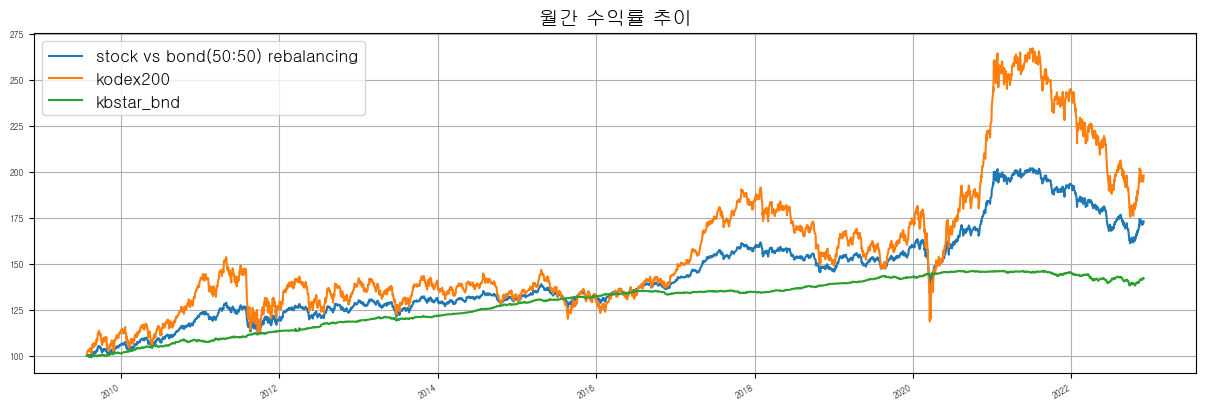

In [4]:
result.plot()
plt.title('월간 수익률 추이')
20
print(result.display())
print(result.display_monthly_returns())

<AxesSubplot:>

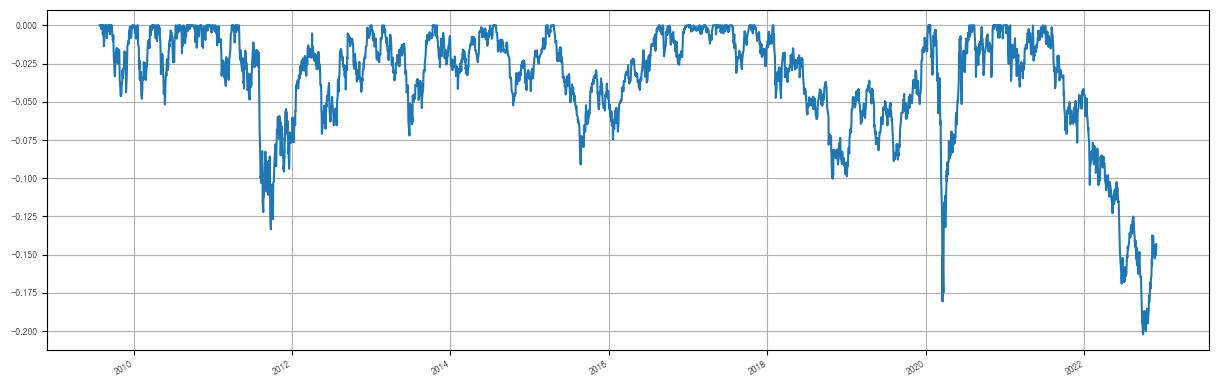

In [5]:
result.backtests['stock vs bond(50:50) rebalancing'].stats.drawdown.plot(figsize=(15,5))